In [ ]:
!pip install numpy matplotlib seaborn tensorflow scikit-learn

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 3188 images belonging to 2 classes.
Found 798 images belonging to 2 classes.
Epoch 1/12


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7481 - loss: 0.5977 - val_accuracy: 0.7632 - val_loss: 0.5403
Epoch 2/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7559 - loss: 0.5632 - val_accuracy: 0.7632 - val_loss: 0.4904
Epoch 3/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7668 - loss: 0.4977 - val_accuracy: 0.7632 - val_loss: 0.6655
Epoch 4/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7783 - loss: 0.4569 - val_accuracy: 0.7632 - val_loss: 0.5340
Epoch 5/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7726 - loss: 0.4664 - val_accuracy: 0.7644 - val_loss: 0.4216
Epoch 6/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7812 - loss: 0.4431 - val_accuracy: 0.8070 - val_loss: 0.4023
Epoch 7/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8095 - loss: 0.4233 - val_accuracy: 0.8108 - val_loss: 0.4292
Epoch 8/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8284 - loss: 0.4244 - val_accuracy: 0.805

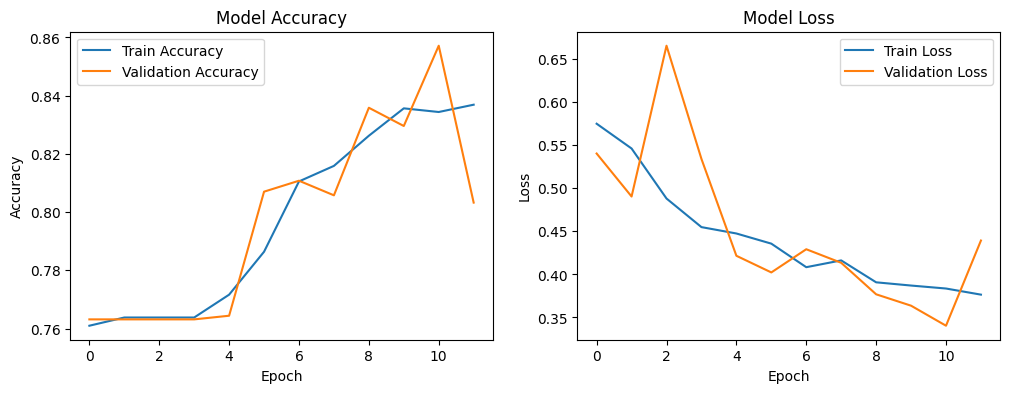

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Classification Report
              precision    recall  f1-score   support

      galaxy       0.20      0.06      0.09       189
        star       0.76      0.93      0.83       609

    accuracy                           0.72       798
   macro avg       0.48      0.49      0.46       798
weighted avg       0.63      0.72      0.66       798

Confusion Matrix


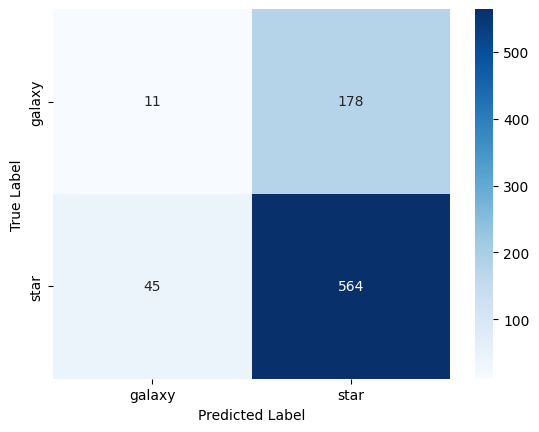

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
# Set up directories
train_dir = 'dataset1/train'
test_dir = 'dataset1/test'


# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the images from directories
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64, 64),
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(64, 64),
                                                  batch_size=16,
                                                  class_mode='categorical',
                                                  color_mode='grayscale')

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=12,
                    validation_data=test_generator)

# Evaluate the model
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generate classification report and confusion matrix
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Found 3188 images belonging to 2 classes.
Found 798 images belonging to 2 classes.
Epoch 1/12


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7535 - loss: 0.5819 - val_accuracy: 0.7632 - val_loss: 0.5289
Epoch 2/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7678 - loss: 0.5337 - val_accuracy: 0.7632 - val_loss: 0.5130
Epoch 3/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7673 - loss: 0.4793 - val_accuracy: 0.7632 - val_loss: 0.4389
Epoch 4/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7556 - loss: 0.4581 - val_accuracy: 0.7632 - val_loss: 0.4435
Epoch 5/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7707 - loss: 0.4288 - val_accuracy: 0.7632 - val_loss: 0.4024
Epoch 6/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7607 - loss: 0.4339 - val_accuracy: 0.7632 - val_loss: 0.3993
Epoch 7/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8017 - loss: 0.4114 - val_accuracy: 0.8346 - val_loss: 0.3755
Epoch 8/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8357 - loss: 0.3745 - val_accuracy: 0.827

Test loss: 0.35111144185066223
Test accuracy: 0.8609022498130798


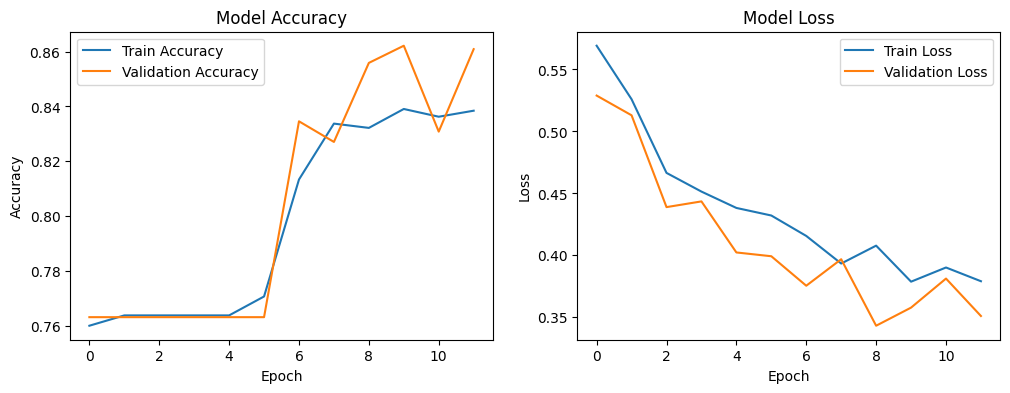

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Classification Report
              precision    recall  f1-score   support

      galaxy       0.19      0.21      0.20       189
        star       0.75      0.72      0.73       609

    accuracy                           0.60       798
   macro avg       0.47      0.46      0.47       798
weighted avg       0.61      0.60      0.61       798

Confusion Matrix


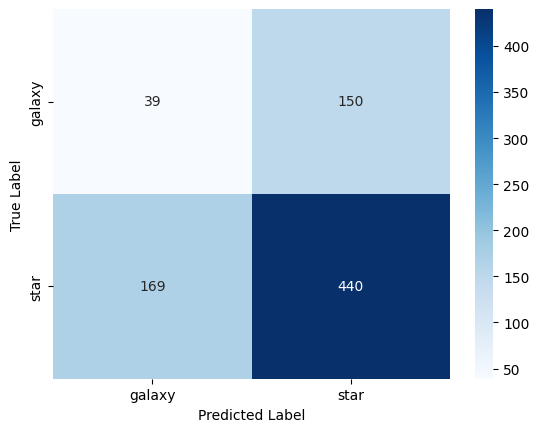

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential, load_model  # Import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Set up directories
train_dir = 'dataset1/train'
test_dir = 'dataset1/test'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the images from directories
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64, 64),
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(64, 64),
                                                  batch_size=16,
                                                  class_mode='categorical',
                                                  color_mode='grayscale')

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=12,
                    validation_data=test_generator)

# Save the model
model.save('star_galaxy_classifier.h5')  # Save the model to an HDF5 file

# Evaluate the model
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generate classification report and confusion matrix
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [13]:
model.save('mymodel.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Class: star
Prediction Probabilities: [[0.11210492 0.88789505]]


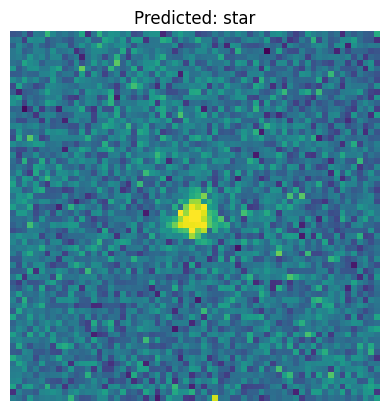

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('star_galaxy_classifier.h5')  # replace with your model's path

def load_and_preprocess_image(img_path):
    """Load and preprocess the image for prediction."""
    img = image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch of size 1
    img_array /= 255.0  # Rescale the image
    return img_array

def predict_image(img_path):
    """Predict the class of the input image."""
    preprocessed_image = load_and_preprocess_image(img_path)
    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class, predictions

# Example of using the prediction function
img_path = 'dataset1/test/star/grb0422a_01_1465_1314_6.jpg'  # replace with the image path you want to predict
predicted_class, predictions = predict_image(img_path)

# Display the prediction results
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class[0]]}")
print(f"Prediction Probabilities: {predictions}")

# Optional: Display the input image
plt.imshow(image.load_img(img_path, color_mode='grayscale'))
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()
